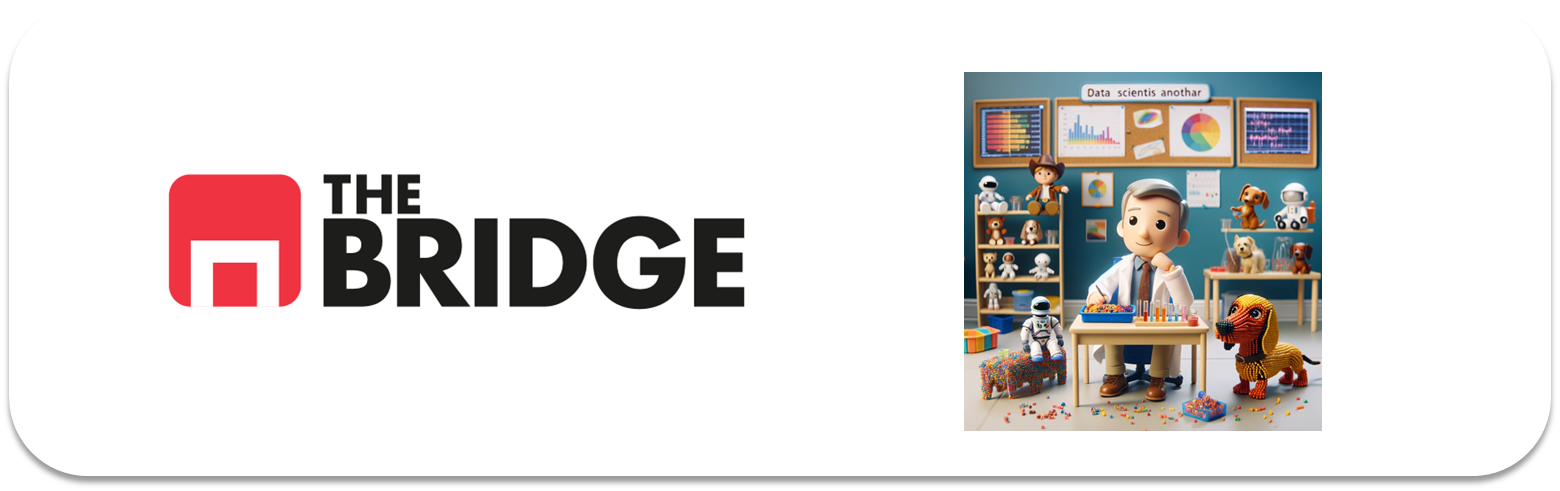

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import * 




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
sns.get_dataset_names()

df_titanic = sns.load_dataset('titanic')

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [4]:
print(df_titanic.isnull().sum()/len(df_titanic))
df_t_final = df_titanic.drop("parch", axis=1)



survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


In [5]:
# Sutituimos los valores NaN de "age" con el valor medio de la columna

print(df_t_final["age"].mean())
edad_media = df_t_final["age"].mean()
df_t_final.fillna({"age": edad_media}, inplace=True)
print(df_t_final.isnull().sum()/len(df_t_final))





29.69911764705882
survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



In [6]:
df_tipi = pd.DataFrame([df_t_final.nunique(), df_t_final.nunique()/len(df_t_final)*100, df_t_final.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipi

,Card,%_Card,Tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,89,9.988777,float64
sibsp,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,category
who,3,0.3367,object
adult_male,2,0.224467,bool


In [7]:
df_tipi["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipi.loc[df_tipi.Card == 2, "Clasificada_como"] = "Binaria"
df_tipi.loc[df_tipi["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipi.loc[df_tipi["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipi

,Card,%_Card,Tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numerica Discreta
sibsp,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica Discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria


|columna|descripcion |tipo|importancia inicial |notas|
|:----|:----|:----|:----|:----|
|survived|define si sobrevivio o no |binaria|0| |
|pclass|clase en la que viajaba |categorica|2| |
|sex|genero de la persona|binaria|1| |
|age|edad de la persona |numerica discreta |3| |
|sibsp|numero de hermanos/padres|numerica continua |3| |
|fare|costo del billete|numerica discreta |1| |
|embarked|ciudad en la que embarco |categorica|1| |
|class|clase en la que viajaba |categorica|1| |
|who|hombre/mujer|categorica|2| |
|adult_male|indica si era un hombre adulto |binaria|2| |
|deck|cubierta en la que viajaba |categorica|3| |
|alive|vivo/muerto|binaria|0| |
|alone|solo/acompañado |binaria|2| |


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [8]:
df_t_final["embarked"] = df_t_final["embark_town"]
df_t_final.drop("embark_town", axis= 1)

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,alive,alone
0,0,3,male,22.000000,1,7.2500,Southampton,Third,man,True,NaN,no,False
1,1,1,female,38.000000,1,71.2833,Cherbourg,First,woman,False,C,yes,False
2,1,3,female,26.000000,0,7.9250,Southampton,Third,woman,False,NaN,yes,True
3,1,1,female,35.000000,1,53.1000,Southampton,First,woman,False,C,yes,False
4,0,3,male,35.000000,0,8.0500,Southampton,Third,man,True,NaN,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,Southampton,Second,man,True,NaN,no,True
887,1,1,female,19.000000,0,30.0000,Southampton,First,woman,False,B,yes,True
888,0,3,female,29.699118,1,23.4500,Southampton,Third,woman,False,NaN,no,False
889,1,1,male,26.000000,0,30.0000,Cherbourg,First,man,True,C,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

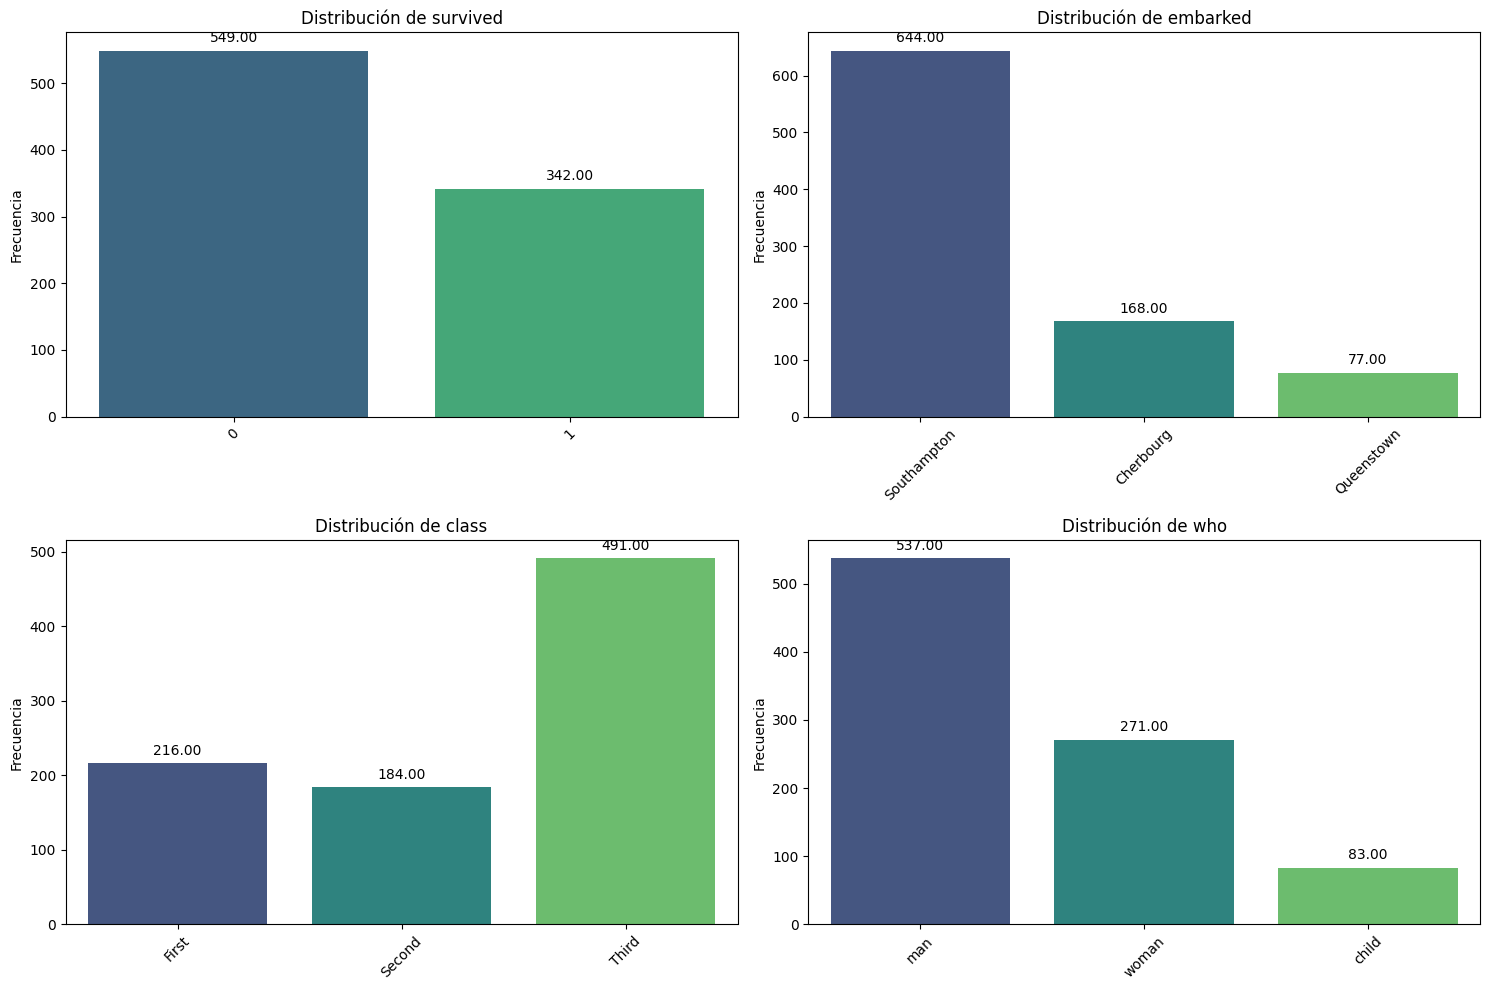

In [9]:
categoricas = ('survived', 
               'embarked',
               'class',
               'who')

pinta_distribucion_categoricas(df_t_final,categoricas, mostrar_valores=True)


### Conclusiones 

- Survived: Vemos como ha habido una mortalidad de casi 2 tercios del pasaje. 
- Embarked: observamos que la mayoria del pasaje procedia desde southhampton siendo el pasaque de queenstown el menos presente. 
- Class: La tercera clase es la mas numerosa pero se da la casuistica que la primera clase (mas cara como norma general) es mas numerosa que la segunda clase. 
- Who: nos indica que casi dos tercios del pasaje eran hombre adultos, casi otro tercio eran mujeres adultas y hay una presencia testimonial de niños, este dato nos ayuda a trazar una relacion con la culumna survived. 



### #2.2 Numéricas

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64


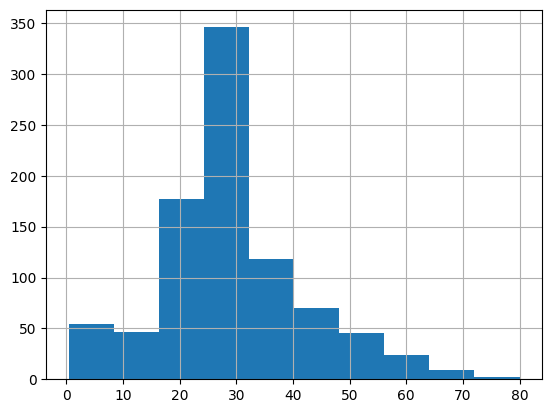

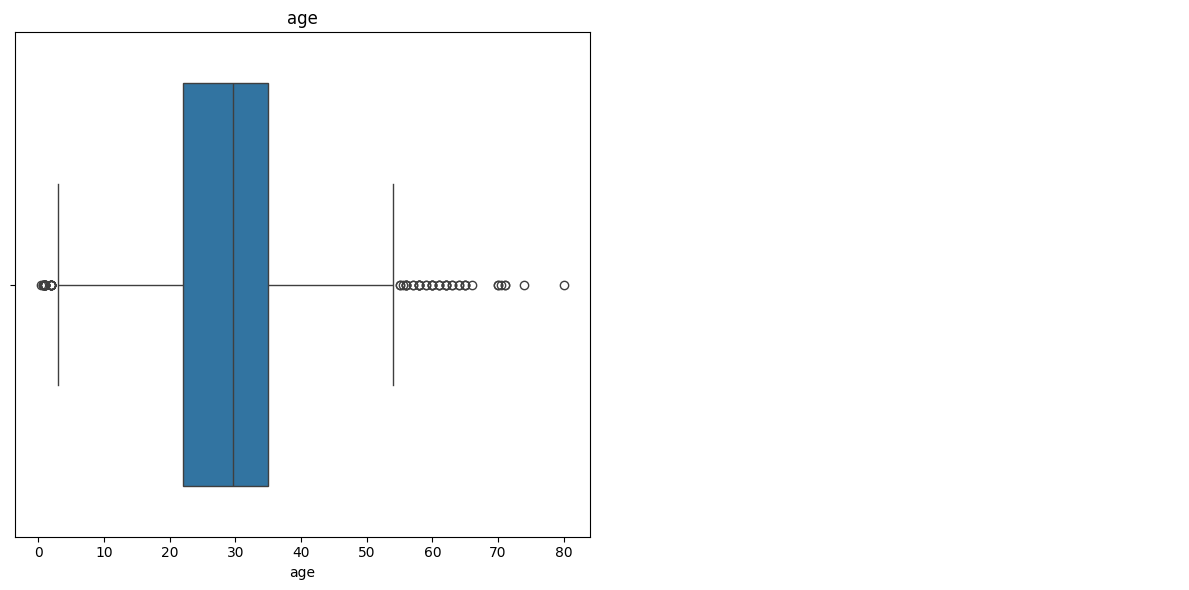

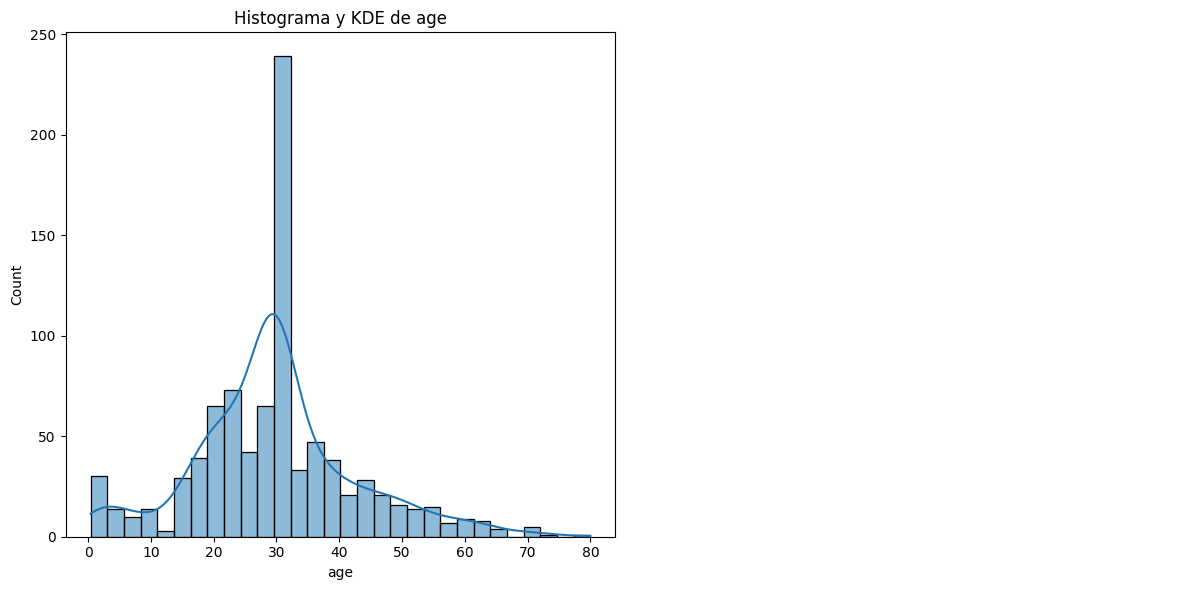

In [20]:
print(df_t_final["age"].describe())
df_t_final["age"].hist()
plot_multiple_boxplots(df_t_final, ["age"])
plot_histo_den(df_t_final, ["age"])

Sobre la edad del pasaje podemos saber que la mayoría del pasaje eran adultos de entre 20 y 40 años, la mayoría de niños eran menores de 10 años y la presencia de adultos mayores de 65 era meramente testimonial. Hasta un 75% del pasaje era menor de 35 años. 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


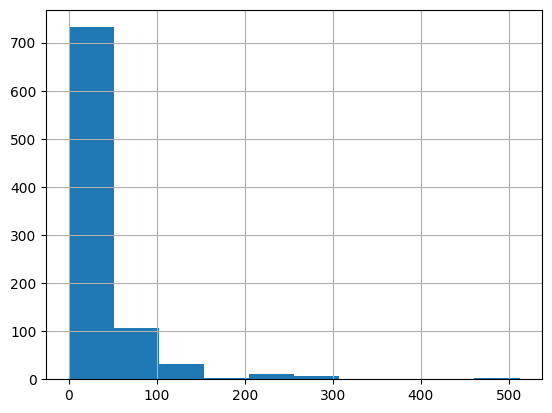

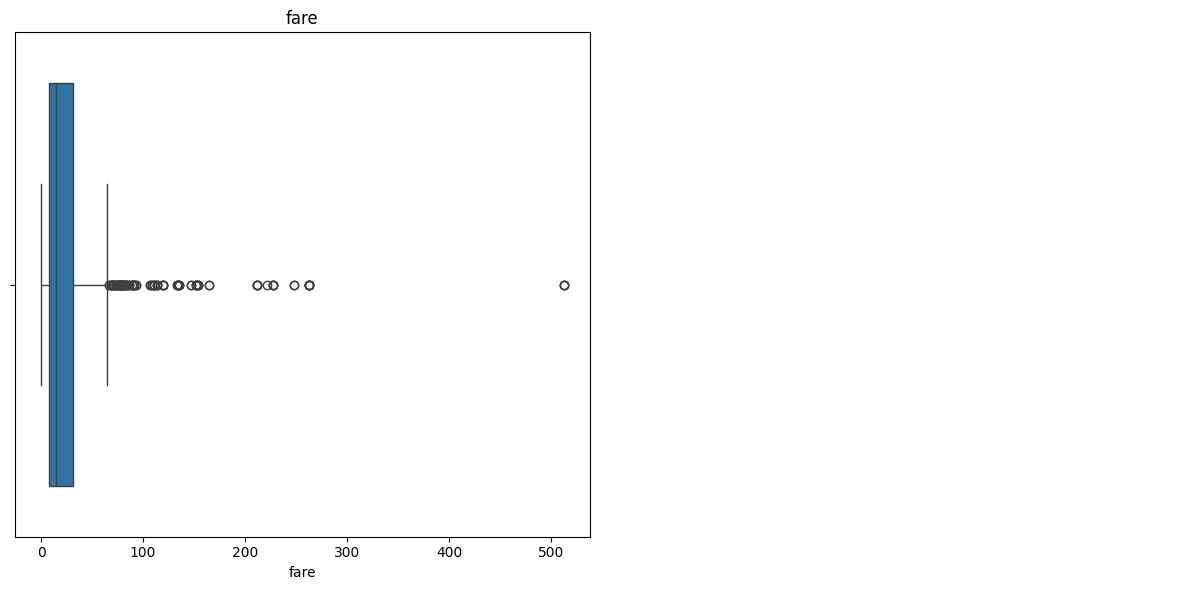

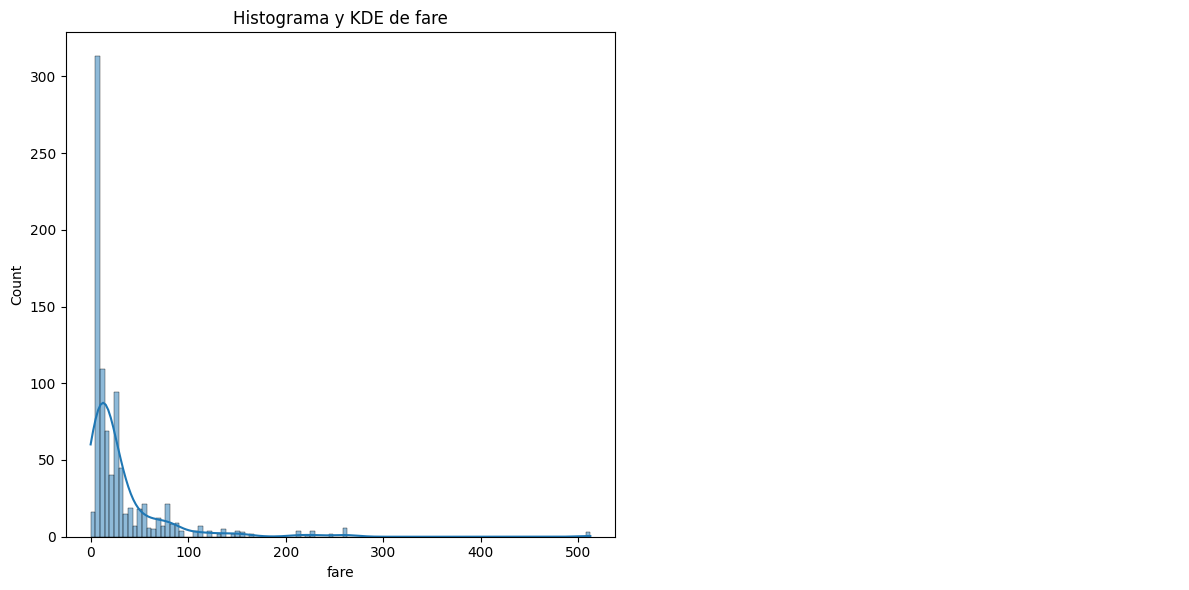

In [21]:
print(df_t_final["fare"].describe())
df_t_final["fare"].hist()
plot_multiple_boxplots(df_t_final, ["fare"])
plot_histo_den(df_t_final, ["fare"])

El precio de los tickets nos indica que casi todos los pasajes que se vendieron tenían un precio muy pequeño, sabiendo que mas de un 75% de los billetes costaron 31$ o menos. Vemos tickets de hasta 512$ como valores que nos indican el precio de la primera clase aunque el numero de tickets de este precio no concuerda con el número de viajeros que ocupaban esos camarotes. 
